# Introduction
This uses keyword analysis (as in Gries, 'A new approach to (key) keywords analysis') to look for key verticalities in the corpus.

### Imports
Import libraries and write settings here.

In [17]:
from music21 import *
import os
import csv
import itertools as it
from collections import Counter
import pandas as pd
import chart_studio.plotly as py
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)
from IPython.display import Image
import math

In [18]:
## loads corpus

linear_corpus_trigrams = corpus.corpora.LocalCorpus('DPhilCorpus_Linear_Trigrams')
linear_corpus_trigrams.existsInSettings

linear_corpus_trigrams.addPath('~/Desktop/Oxford/Corpus/Sounding Corpus (Movements) Linear/Trigrams/XML/')
linear_corpus_trigrams.directoryPaths

linear_corpus_trigrams.save()
linear_corpus_trigrams.existsInSettings

/opt/anaconda3/lib/python3.7/site-packages/music21/corpus/corpora.py: WARNING: DPhilCorpus_Linear_Trigrams metadata cache: starting processing of paths: 107
/opt/anaconda3/lib/python3.7/site-packages/music21/corpus/corpora.py: WARNING: cache: filename: /var/folders/cr/p20lv70n2wbf2w8jfmxbh69w0000gp/T/music21/local-DPhilCorpus_Linear_Trigrams.p.gz
bundles.py: WARNING: MetadataBundle Modification Time: 1608735871.2726376
bundles.py: WARNING: Skipped 107 sources already in cache.
/opt/anaconda3/lib/python3.7/site-packages/music21/corpus/corpora.py: WARNING: cache: writing time: 0.137 md items: 107

/opt/anaconda3/lib/python3.7/site-packages/music21/corpus/corpora.py: WARNING: cache: filename: /var/folders/cr/p20lv70n2wbf2w8jfmxbh69w0000gp/T/music21/local-DPhilCorpus_Linear_Trigrams.p.gz


True

In [19]:
## organises corpus

pieceName = []

listOfWorks = linear_corpus_trigrams.search('Op. ')
for el in listOfWorks:
    pieceName.append(el.sourcePath)

# Data Collection
Counts total durations of each verticality (normal order) but does not convert this into proportions for each movement.

In [20]:
## counts total durations

combined_list_of_counts = []
for el in pieceName:
    thePiece = corpus.parse(el)
    fileTitle = str(el).replace("/Users/joshua ballance/Desktop/Oxford/Corpus/Sounding Corpus (Movements) Linear/XML/", "").replace(".xml", "").replace(".mxl", "")
    opusNumber = fileTitle.replace("Op.", "").replace(" ", "").replace("i", "").replace("v", "")
    movementNumber = fileTitle.replace("Op.", "").replace(" ", "").replace("1", "").replace("2", "").replace("3", "").replace("4", "").replace("5", "").replace("6", "").replace("7", "").replace("8", "").replace("9", "").replace("0", "")
    
    three_note_list = []
    for h in range(0,len(thePiece.parts)):
        current_part = thePiece.parts[h]
        listOfNotes = current_part.flat.getElementsByClass(note.Note)
        listOfRests = current_part.flat.getElementsByClass(note.Rest)
        
        for i in range(0,len(listOfNotes)-2):
            temp_list_of_notes = []
            firstNote = listOfNotes[i]
            secondNote = listOfNotes[i+1]
            thirdNote = listOfNotes[i+2]
            rhythmicDifference = secondNote.offset-firstNote.offset
            if firstNote.quarterLength == rhythmicDifference:
                if 'start' in str(firstNote.tie):
                    pass
                elif 'stop' in str(secondNote.tie):
                    pass
                elif 'continue' in str(firstNote.tie):
                    pass
                elif 'continue' in str(secondNote.tie):
                    pass
                else:
                    temp_list_of_notes.append(firstNote)
                    temp_list_of_notes.append(secondNote)
                    rhythmicDifference = thirdNote.offset-secondNote.offset
                    if secondNote.quarterLength == rhythmicDifference:
                        if 'start' in str(secondNote.tie):
                            pass
                        elif 'stop' in str(thirdNote.tie):
                            pass
                        elif 'continue' in str(secondNote.tie):
                            pass
                        elif 'continue' in str(thirdNote.tie):
                            pass
                        else:
                            temp_list_of_notes.append(thirdNote)
                    else:
                        barNumber = thirdNote.measureNumber
                        singleBar = current_part.measure(barNumber)
                        barLength = singleBar.quarterLength
                        if rhythmicDifference < barLength/2:
                            temp_list_of_notes.append(thirdNote)
            else:
                barNumber = secondNote.measureNumber
                singleBar = current_part.measure(barNumber)
                barLength = singleBar.quarterLength
                if rhythmicDifference < barLength/2:
                    temp_list_of_notes.append(firstNote)
                    temp_list_of_notes.append(secondNote)
                    rhythmicDifference = thirdNote.offset-secondNote.offset
                    if secondNote.quarterLength == rhythmicDifference:
                        if 'start' in str(secondNote.tie):
                            pass
                        elif 'stop' in str(thirdNote.tie):
                            pass
                        elif 'continue' in str(secondNote.tie):
                            pass
                        elif 'continue' in str(thirdNote.tie):
                            pass
                        else:
                            temp_list_of_notes.append(thirdNote)
                    else:
                        barNumber = thirdNote.measureNumber
                        singleBar = current_part.measure(barNumber)
                        barLength = singleBar.quarterLength
                        if rhythmicDifference < barLength/2:
                            temp_list_of_notes.append(thirdNote)
            if len(temp_list_of_notes) == 3:
                three_note_list.append(temp_list_of_notes)
    normal_order_list = []
    for j in three_note_list:
        temp_chord = chord.Chord(j)
        temp = []
        transposedNormalOrder = []
        for k in temp_chord.normalOrder:
            if k >= temp_chord.normalOrder[0]: 
                transposedNormalOrder.append(k-temp_chord.normalOrder[0])
            else:
                transposedNormalOrder.append(k+12-temp_chord.normalOrder[0])
        normal_order_list.append(str(transposedNormalOrder))
    normal_order_set = set(normal_order_list)
    c = Counter(normal_order_list)

    listOfCounts = [fileTitle]
    for l in normal_order_set:
        info = [l, c[l]]
        listOfCounts.append(info)    
    
    combined_list_of_counts.append(listOfCounts)

In [21]:
## organises data and counts total number of trigrams per movement

complete_normal_order_list = []
for i in combined_list_of_counts:
    for j in i:
        if len(j) == 2:
            complete_normal_order_list.append(j[0])
complete_normal_order_set = set(complete_normal_order_list)
sorted_complete_normal_order_set = sorted(complete_normal_order_set, key = lambda item: (len(item), item))

list_of_titles = []
list_of_results  = []
for i in combined_list_of_counts:
    list_of_titles.append(i[0])
    list_of_just_counts = []
    temp_list_of_normal_orders = []
    list_of_only_counts = []
    for j in i:
        if len(j) == 2:
            list_of_only_counts.append(j[1])
            temp_list_of_normal_orders.append(j[0])
    for k in sorted_complete_normal_order_set:
        if k in temp_list_of_normal_orders:
            for l in i:
                if len(l) == 2:
                    if l[0] == k:
                        list_of_just_counts.append(l[1])
        else:
            list_of_just_counts.append(0)
    list_of_results.append(list_of_just_counts)
df = pd.DataFrame(list_of_results, columns = sorted_complete_normal_order_set, index = list_of_titles)

total_df = df
list_of_vals = []
for i in range(0, len(total_df.index)):
    temp_value = sum(total_df.iloc[i:i+1, :].values.flat)
    list_of_vals.append(temp_value)
total_df['Total'] = list_of_vals
data2 = total_df

In [22]:
## loads proportions data

proportions_data2 = pd.read_csv('/Users/joshua ballance/Desktop/Linear Interval Content - Total - Three Notes.csv', index_col = 0)

# Keyword Analysis

In [23]:
## calculates DKL values by using proportions data weighted by total number of trigrams in each movement to facilitate inter-movement comparison

DKL_values = []
corpus_duration = sum(data2.iloc[:, len(data2.columns)-1:].values.flat)
for i in range(0,len(data2.columns)-1):
    list_of_plog_values = []
    summed_verticality_durations = sum(data2.iloc[:, i:i+1].values.flat)
    for j in range(0, len(data2.index)):
        movement_duration = float(data2.iloc[j:j+1, len(data2.columns)-1:].values)
        verticality_duration = float(data2.iloc[j:j+1, i:i+1].values)
        verticality_proportion = verticality_duration/summed_verticality_durations
        movement_proportion = movement_duration/corpus_duration
        if verticality_proportion == 0:
            list_of_plog_values.append(0)
        else:
            plog2pq_value = verticality_proportion*(math.log2(verticality_proportion/movement_proportion))
            list_of_plog_values.append(plog2pq_value)
    verticality_plog_value = sum(list_of_plog_values)
    DKL_value = 1-(math.exp(-verticality_plog_value))
    DKL_values.append(DKL_value)     
    
totals = []
for k in range(0, len(proportions_data2.columns)):
    summed_proportion = sum(proportions_data2.iloc[:, k:k+1].values.flat)
    totals.append(summed_proportion)
total_proportions = []
for j in totals:
    new_total = j/sum(totals)*100
    total_proportions.append(new_total)
    
proportions_data2 = proportions_data2.transpose()
proportions_data2['Total'] = total_proportions
proportions_data2['DKL Value'] = DKL_values

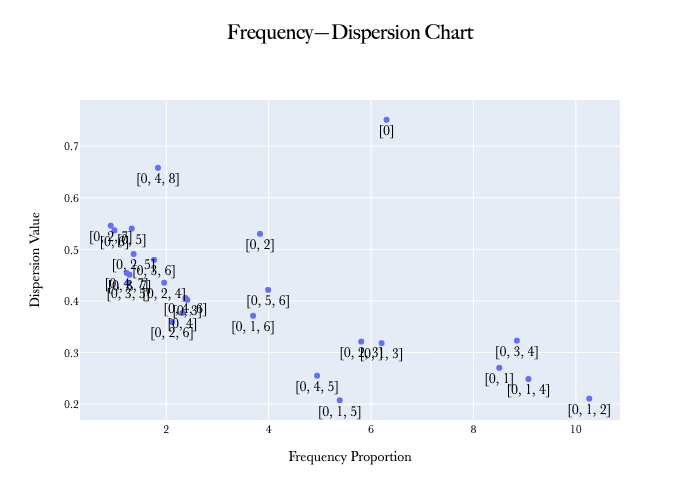

In [27]:
## plots DKL against frequency

fig = go.Figure()
fig.add_trace(go.Scatter(x = proportions_data2['Total'], y = proportions_data2['DKL Value'], mode='markers+text', text=proportions_data2.index.values, textposition="bottom center", textfont_size=14))
fig.update_layout(xaxis=(dict(title={'text': 'Frequency Proportion'})))
fig.update_layout(yaxis=(dict(title={'text': 'Dispersion Value'})))
fig.update_layout(title={'text': 'Frequency—Dispersion Chart', 'font':dict(family="Big Caslon, monospace", size=20, color='rgb(0,0,0)'), 'y':0.95, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
fig.update_layout(font=dict(family="Baskerville, monospace", size=12, color='rgb(0,0,0)'))
img_bytes = fig.to_image(format='png', scale=1)
fig.show()
Image(img_bytes)

In [25]:
## returns sorted DKL values

temp_df = proportions_data2.iloc[:, 108:109]
temp_df = temp_df.sort_values(by = 'DKL Value')
temp_df

,DKL Value
"[0, 1, 5]",0.207516
"[0, 1, 2]",0.210669
"[0, 1, 4]",0.248673
"[0, 4, 5]",0.255095
"[0, 1]",0.270425
"[0, 1, 3]",0.318226
"[0, 2, 3]",0.321166
"[0, 3, 4]",0.323061
"[0, 2, 6]",0.359197
"[0, 1, 6]",0.371215
